# 1. Imports

In [1]:
#General
import pandas as pd
import numpy as np


import matplotlib.pyplot            as plt
import seaborn                      as sns
from sklearn.preprocessing          import StandardScaler
from sklearn                        import preprocessing, linear_model
from sklearn.metrics                import r2_score, mean_squared_error
from sklearn.model_selection        import train_test_split, cross_val_score,GridSearchCV

#Models
from sklearn.linear_model           import LinearRegression, Ridge, Lasso
from sklearn.tree                   import DecisionTreeRegressor
from sklearn.ensemble               import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
import statsmodels.api              as sm

In [2]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

# 2. Load Data

In [3]:
#Load the file generated from EDA.
file = 'Asteroid_EDA_Clean.csv'
df = pd.read_csv(file, sep=',', index_col=0)

In [4]:
#Verify that the data loaded correctly.
df.head().T

,0,1,2,3,4
semi-major_axis(au),2.76917,2.77247,2.66915,2.36142,2.57425
eccentricity,0.076009,0.230337,0.256942,0.0887215,0.191095
x-y_inclination(deg),10.5941,34.8362,12.9889,7.14177,5.36699
longitude_asc_node,80.3055,173.08,169.853,103.811,141.577
argument_perihelion,73.5977,310.049,248.139,150.729,358.688
perihelion_dist(au),2.55868,2.13386,1.98333,2.15191,2.08232
aphelion_dist(au),2.97965,3.41107,3.35497,2.57093,3.06617
data_arc(d),8822,72318,72684,24288,63507
n_obs_used,1002,8490,7104,9325,2916
diameter,939.4,545,246.596,525.4,106.699


# 3. Feature Engineering

After some initial modeling, it was seen that the relationship between the features and the target variable was not linear. To adjust for this, created a feature for the log of diameter.

In [5]:
df['log'] = np.log(df['diameter'])

# 4. Explore the Data

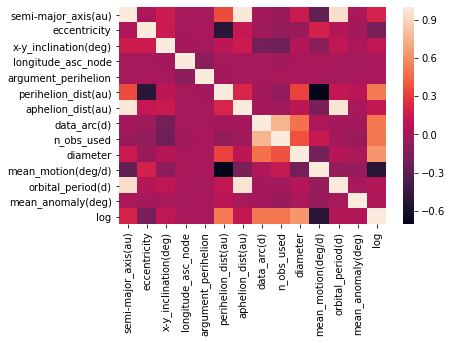

In [6]:
# Make a heatmap of the data 
sns.heatmap(df.corr());

# 5. Models

## Linear Regression with OLS

In [7]:
#Split data into features and target.
y = df['log']
X = df.drop(columns = ['diameter','log','class'])
X = sm.add_constant(X)

#Create training and test data.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

#Standarize the features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Create the model.
rm = sm.OLS(y_train, X_train)

#Train the model.
rm_fit = rm.fit()

#Predictions
rm_pred = rm_fit.predict(X_test)

#Evaluate the model.
rm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    log   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                 2.526e+04
Date:                Tue, 20 Apr 2021   Prob (F-statistic):               0.00
Time:                        01:35:06   Log-Likelihood:                -38034.
No. Observations:              110108   AIC:                         7.609e+04
Df Residuals:                  110096   BIC:                         7.621e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4548      0.015     31.305      0.000       0.426       0.483
semi-major_axis(au)      0.1379      0.001    122.803      0.000       0.136       0.140
eccentricity             0.7913      0.021     37.991      0.000       0.751       0.832
x-y_inclination(deg)     0.0161      0.000    100.472      0.000       0.016       0.016
longitude_asc_node       0.0001   1.01e-05     11.919      0.000       0.000       0.000
argument_perihelion   4.667e-05      1e-05      4.666      0.000    2.71e-05    6.63e-05
perihelion_dist(au)      0.3755      0.003    108.222      0.000       0.369       0.382
aphelion_dist(au)       -0.0996      0.002    -46.444      0.000      -0.104      -0.095
data_arc(d)           2.452e-05   2.58e-07     94.877      0.000     2.4e-05     2.5e-05
n_obs_used               0.0005   2.71e-06    179.088      0.000       0.000       0.000
mean_motion(deg/d)      -4.0164      0.027   -151.327      0.000      -4.068      -3.964
orbital_period(d)     7.314e-06   6.14e-07     11.911      0.000    6.11e-06    8.52e-06
mean_anomaly(deg)     4.964e-05   9.99e-06      4.968      0.000    3.01e-05    6.92e-05
==============================================================================
Omnibus:                    30868.504   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2721958.488
Skew:                          -0.339   Prob(JB):                         0.00
Kurtosis:                      27.348   Cond. No.                     2.28e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.78e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

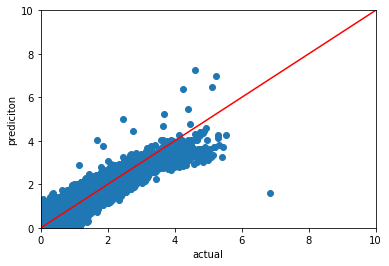

In [8]:
#Plot the predictions against the actual values.
plt.scatter(y_test, rm_pred)
plt.plot([0,10],[0,10],c = 'red')
plt.xlabel('actual')
plt.ylabel('prediciton')
plt.xlim(0, 10) 
plt.ylim(0, 10) 
plt.show()

### Exploring groups by 'Perihelion Distance'

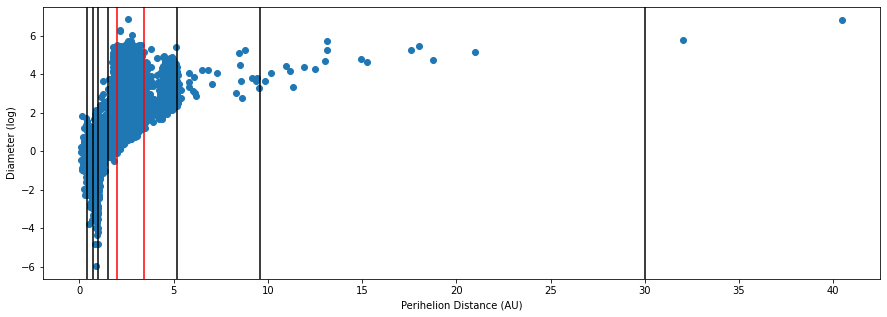

In [9]:
from matplotlib.pyplot import figure
figure(figsize=(15,5))
plt.scatter(data=df,x='perihelion_dist(au)',y='log');
#Mercury
plt.axvline(x=.4,c='black')
#Venus
plt.axvline(x=.7,c='black')
#Earth
plt.axvline(x=1,c='black')
#Mars
plt.axvline(x=1.5,c='black')
#Asteroid Belt
plt.axvline(x=2,c='red')
plt.axvline(x=3.4,c='red')
#Jupiter
plt.axvline(x=5.2,c='black')
#Saturn
plt.axvline(x=9.6,c='black')
#Neptune/Kuiper Belt
plt.axvline(x=30,c='black')
plt.xlabel('Perihelion Distance (AU)')
plt.ylabel('Diameter (log)')
plt.show()


The asteroid belt lies between 2.2 (au) and 3.2 (au) and has the greatest number of asteroids and has a large variety in sizes of asteroids. Below or above that range there is a distinct difference in asteroid diameter due the gravitaional pull by the sun and planets. 

However, the linear regression model only improved for the asteroids greater than 9.6 AU. Other subsets either performed the same or worse.

### Ridge Regressor

In [10]:
alphas = [0.01, 0.10, 0.50, 0.75, 1]
for a in alphas:
    ridge = Ridge(alpha = a)
    ridge.fit(X_train, y_train)
    print('Alpha: ', a)
    print('Train Score: ', ridge.score(X_train, y_train))
    print('Test Score: ', ridge.score(X_test, y_test))
    print()

Alpha:  0.01
Train Score:  0.7162430689950703
Test Score:  0.7141522214542386

Alpha:  0.1
Train Score:  0.7162430485804548
Test Score:  0.7141588360457698

Alpha:  0.5
Train Score:  0.7162425560919141
Test Score:  0.7141877775081242

Alpha:  0.75
Train Score:  0.7162419180832207
Test Score:  0.7142054902136377

Alpha:  1
Train Score:  0.7162410287477665
Test Score:  0.7142229166503693



There is not a significant improvement from Linear Regression.

### Lasso Regressor

In [11]:
alphas = [0.01, 0.10, 0.50, 0.75, 1]
for a in alphas:
    lasso = Lasso(alpha = a)
    lasso.fit(X_train, y_train)
    print('Alpha: ', a)
    print('Train Score: ', lasso.score(X_train, y_train))
    print('Test Score: ', lasso.score(X_test, y_test))
    print()

Alpha:  0.01
Train Score:  0.6458828454887032
Test Score:  0.6583766139917421

Alpha:  0.1
Train Score:  0.5491979542433353
Test Score:  0.54758747854511

Alpha:  0.5
Train Score:  0.34403981866499367
Test Score:  0.3403139451776156

Alpha:  0.75
Train Score:  0.32636820850102777
Test Score:  0.32268711689351115

Alpha:  1
Train Score:  0.3083984750083505
Test Score:  0.3044885417404659



Lasso regression does not work as well as Linear Regression.

### Random Forest Regressor

Default parameters were found to have the best performance for this model.

In [12]:
#Split data into features and target.
y = df['log']
X = df.drop(columns=['diameter','log','class'])

#Create training and test data.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

#Standarize the features

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

#Create the model.
rf = RandomForestRegressor()

#Train the model.
rf.fit(X_train, y_train)

#Use the model to make predictions.
rf_pred = rf.predict(X_test)

#Evaluate the model.
rf_score = rf.score(X_train, y_train)
rf_score_test = rf.score(X_test, y_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)

print('Train Score:',rf_score)
print('Test Score:', rf_score_test)
print('MSE:', rf_mse)
print('RMSE:', rf_rmse)

Train Score: 0.9701777128375961
Test Score: 0.8344359997975732
MSE: 0.06790449064438243
RMSE: 0.2605849010291702


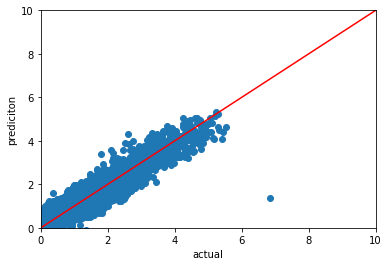

In [13]:
plt.scatter(y_test,rf_pred)
plt.plot([0,10],[0,10],c = 'red')
plt.xlabel('actual')
plt.ylabel('prediciton')
plt.xlim(0, 10) 
plt.ylim(0, 10) 
plt.show()

12


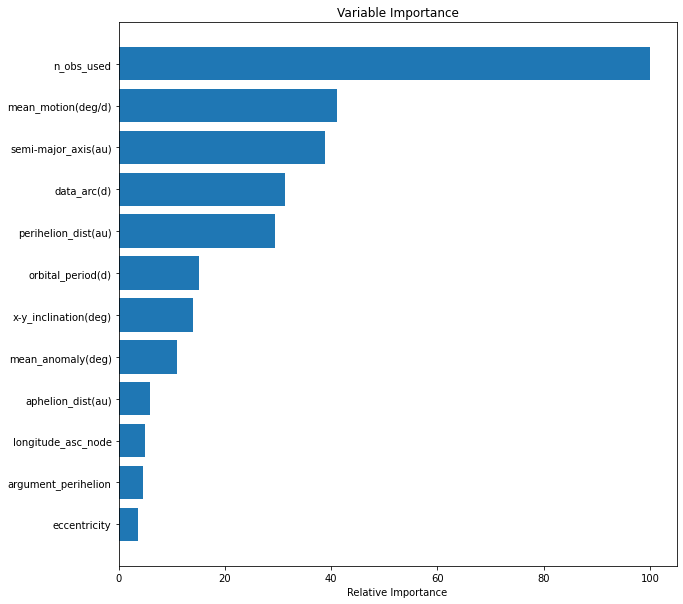

In [14]:
feature_importance = rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

After exploring different combinations of the features, there appears to be important relationships between the features. All remaining features will be used for modeling. 

In [15]:
n_estimators = [50, 100, 200, 400]
for n in n_estimators:
    rf = RandomForestRegressor(n_estimators = n)
    rf.fit(X_train, y_train)
    print('n_estimators: ', n)
    print('Train Score: ', rf.score(X_train, y_train))
    print('Test Score: ', rf.score(X_test, y_test))
    print()

n_estimators:  50
Train Score:  0.9777366091821277
Test Score:  0.8473645181456508

n_estimators:  100
Train Score:  0.9786690718762744
Test Score:  0.8492519356408114

n_estimators:  200
Train Score:  0.9791524275909493
Test Score:  0.8506250988362155

n_estimators:  400
Train Score:  0.9794220133293173
Test Score:  0.8505662182084468



### Gradient Boosting Regressor

In [16]:
#Split data into features and target.
y = df['log']
X = df.drop(columns=['diameter','log','class'])

#Create training and test data.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

#Standarize the features

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

#Create the model.
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingRegressor(learning_rate = learning_rate,
                                  n_estimators = 200)
    gb.fit(X_train, y_train)
    print('Learning Rate: ', learning_rate)
    print('Train Score:', gb.score(X_train, y_train))
    print('Test Score:', gb.score(X_test, y_test))
    print()

Learning Rate:  0.05
Train Score: 0.8124855385890959
Test Score: 0.808114646311674

Learning Rate:  0.1
Train Score: 0.8233339973692817
Test Score: 0.8174267635336709

Learning Rate:  0.25
Train Score: 0.838091955704535
Test Score: 0.8269130591103725

Learning Rate:  0.5
Train Score: 0.8486267056069239
Test Score: 0.8323240693415278

Learning Rate:  0.75
Train Score: 0.8537185899333496
Test Score: 0.8304786982980188

Learning Rate:  1
Train Score: 0.8531542183145006
Test Score: 0.8232466878965813



In [17]:
#Split data into features and target.
y = df['log']
X = df.drop(columns=['diameter','log','class'])

#Create training and test data.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

#Standarize the features

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

#Create the model.
n_estimators = [50, 100, 200, 400]
for n in n_estimators:
    gb = GradientBoostingRegressor(learning_rate = 0.75,
                                  n_estimators = n)
    gb.fit(X_train, y_train)
    print('n_estimators: ', n)
    print('Train Score:', gb.score(X_train, y_train))
    print('Test Score:', gb.score(X_test, y_test))
    print()

n_estimators:  50
Train Score: 0.8223757136166254
Test Score: 0.8115908311558924

n_estimators:  100
Train Score: 0.8402366103517002
Test Score: 0.8262807133525814

n_estimators:  200
Train Score: 0.8537185899333496
Test Score: 0.8305260066459716

n_estimators:  400
Train Score: 0.8670134385309988
Test Score: 0.8291339366414235



In [18]:
gb = GradientBoostingRegressor(learning_rate = 0.75, n_estimators = 200)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

#Evaluate the model.
gb_score = gb.score(X_train, y_train)
gb_score_test = gb.score(X_test, y_test)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_rmse = np.sqrt(gb_mse)

print('Train Score:',gb_score)
print('Test Score:', gb_score_test)
print('MSE:', gb_mse)
print('RMSE:', gb_rmse)

Train Score: 0.8537185899333496
Test Score: 0.8305110870653488
MSE: 0.06951425604978151
RMSE: 0.2636555632824415


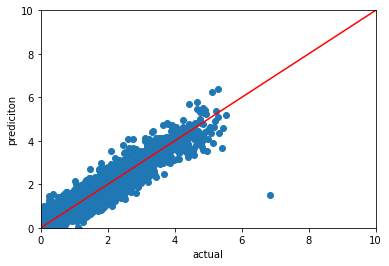

In [19]:
plt.scatter(y_test,gb_pred)
plt.plot([0,10],[0,10],c = 'red')
plt.xlabel('actual')
plt.ylabel('prediciton')
plt.xlim(0, 10) 
plt.ylim(0, 10) 
plt.show()